Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Statistical Summary:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523

C:\Users\Dell\AppData\Local\Temp\ipykernel_18040\2397507347.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\Dell\AppData\Local\Temp\ipykernel_18040\2397507347.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

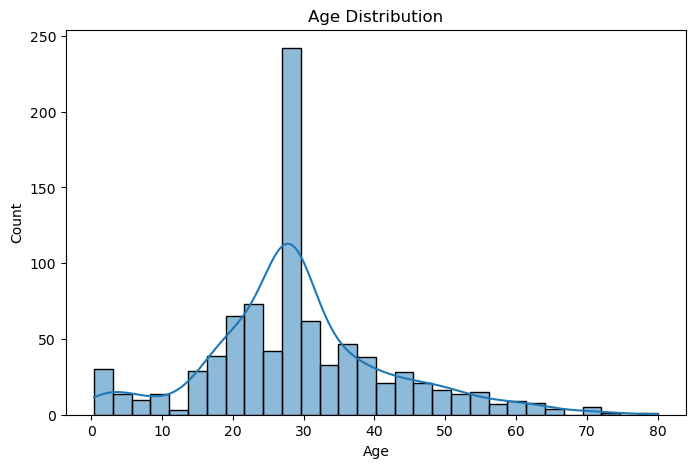

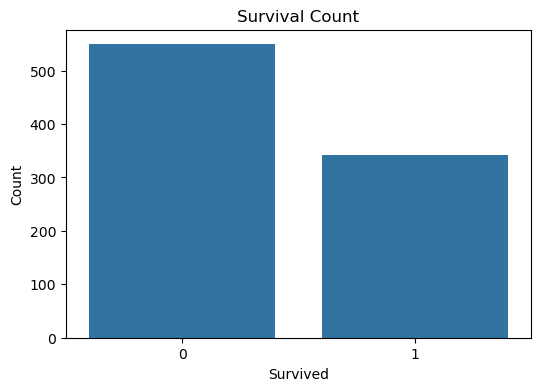

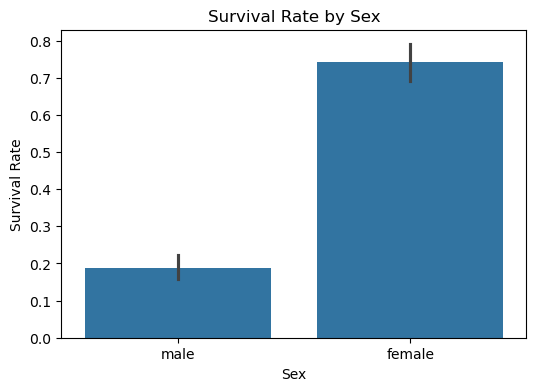

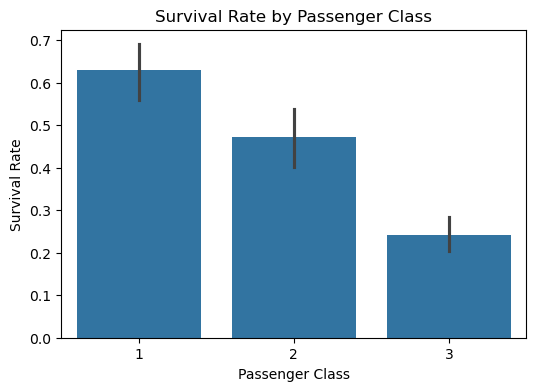

ValueError: could not convert string to float: 'Braund, Mr. Owen Harris'

<Figure size 1000x800 with 0 Axes>

In [2]:
# Titanic EDA

# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

# Basic Info
print("Dataset Info:")
print(df.info())
print("\nStatistical Summary:")
print(df.describe())
print("\nMissing Values:")
print(df.isnull().sum())

# Handling missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop('Cabin', axis=1, inplace=True)

# Univariate Analysis
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

# Bivariate Analysis
plt.figure(figsize=(6,4))
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.show()

plt.figure(figsize=(6,4))
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10,8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Pairplot
sns.pairplot(df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']])
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

# Observations
print("""
Observations:
1. Age distribution is right-skewed, most passengers are between 20-40 years.
2. More passengers did not survive (0) compared to those who did (1).
3. Females had a significantly higher survival rate than males.
4. First-class passengers had a better survival rate.
5. Fare positively correlates with survival and class.
""")

# Summary
print("""
Summary of Findings:
- Gender played a significant role in survival chances.
- Higher-class passengers (Pclass=1) had better survival rates.
- Age distribution shows many younger adults were aboard.
- Fare and Class are strongly related.
""")